Comparison of vertical velocities at a fixed depth (different Kiso's)
==

In [1]:
#KRM

import numpy as np

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

from math import *

import scipy.io

import scipy as spy

%matplotlib inline

from netCDF4 import Dataset

import pylab as pl

import os 

import sys

import seaborn as sns

In [2]:
lib_path = os.path.abspath('/ocean/kramosmu/Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout 

import ShelfBreakTools_MITgcm as sb


In [3]:
# Functions
def vertTrans(Mask, W,zlim=30):
    mask_expand = np.expand_dims(Mask[zlim,227:267,120:240],0)
    mask_expand = mask_expand + np.zeros(W[:,zlim,227:267,120:240].shape)

    vert = W[:,zlim,227:267,120:240]
    VertTrans= np.sum(np.sum(np.ma.masked_array(vert,mask = mask_expand),axis=1),axis=1)
    return VertTrans


In [4]:
#Base case, iso =1 , No 3d diff.
CanyonGrid='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc'
CanyonGridOut = Dataset(CanyonGrid)
#for dimobj in CanyonGridOut.variables.values():
#    print dimobj
CanyonState='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/stateGlob.nc'
CanyonStateOut = Dataset(CanyonState)

CanyonState2='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/stateGlob.nc'
CanyonState2Out = Dataset(CanyonState2)

CanyonState4='/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04/stateGlob.nc'
CanyonState4Out = Dataset(CanyonState4)


In [5]:
# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size 

z = CanyonStateOut.variables['Z']
#print(z[10])
Time = CanyonStateOut.variables['T']
#print(Time[:])

xc = rout.getField(CanyonGrid, 'XC') # x coords tracer cells
yc = rout.getField(CanyonGrid, 'YC') # y coords tracer cells
rc =  CanyonGridOut.variables['RC'] # y coords tracer cells

bathy = rout.getField(CanyonGrid, 'Depth')

hFacC = rout.getField(CanyonGrid, 'HFacC')
MaskC = rout.getMask(CanyonGrid, 'HFacC')

rA = rout.getField(CanyonGrid, 'rA')


In [6]:
sns.set()
sns.set_style('white')
sns.set_context('talk')

In [7]:
WCNT3 = rout.getField(CanyonState,'W')
WCNT2 = rout.getField(CanyonState2,'W')
WCNT4 = rout.getField(CanyonState4,'W')

   

In [8]:
mask_expand = np.expand_dims(MaskC,0)
mask_expand = mask_expand + np.zeros(WCNT3.shape)


WCNT3= np.ma.masked_array(WCNT3,mask = mask_expand)
WCNT2= np.ma.masked_array(WCNT2,mask = mask_expand)
WCNT4= np.ma.masked_array(WCNT4,mask = mask_expand)
 

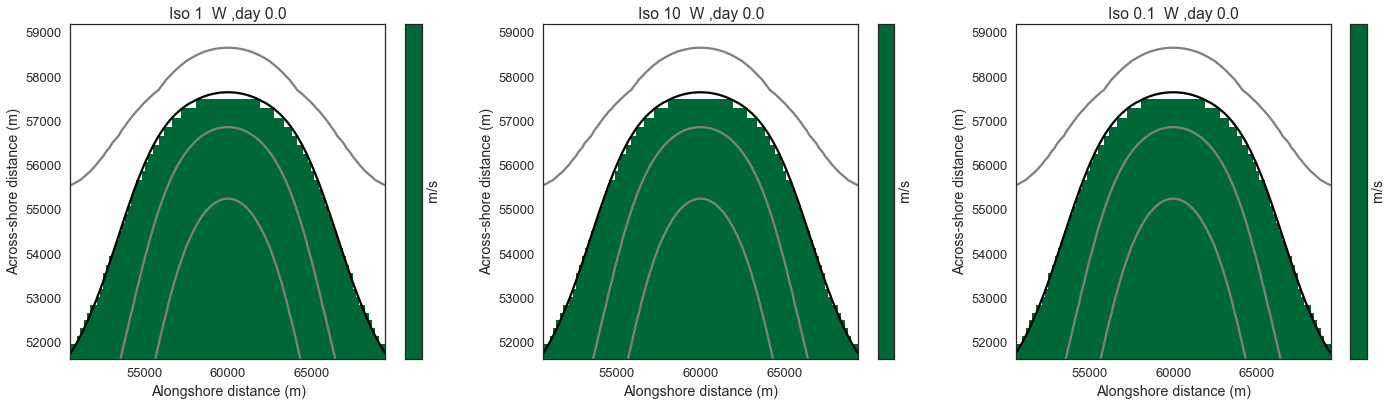

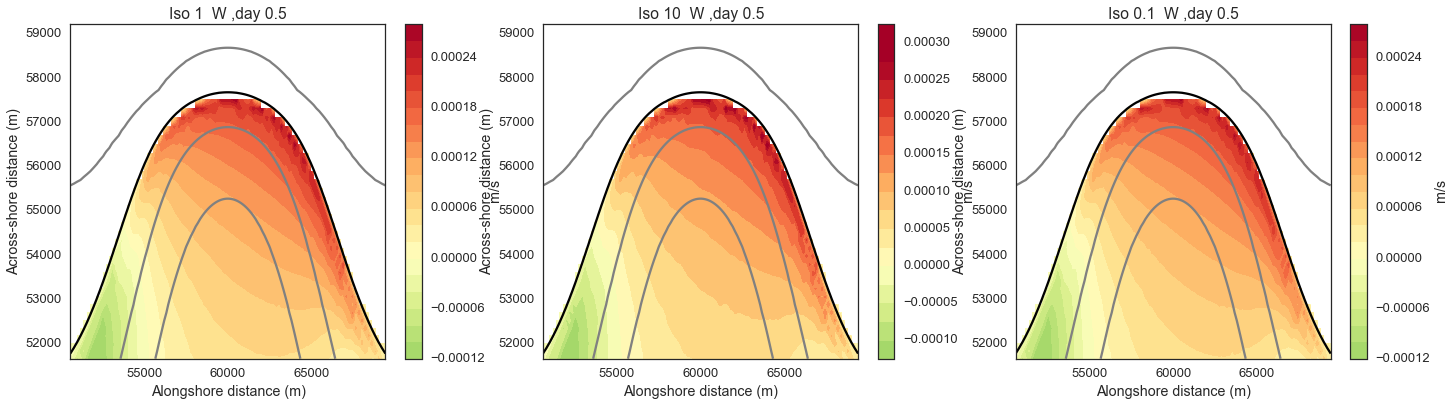

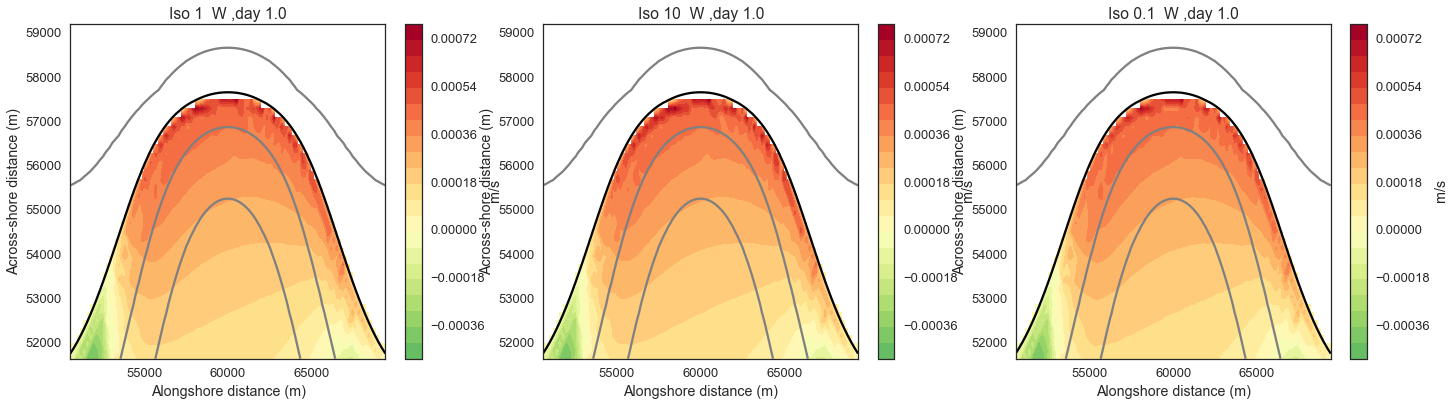

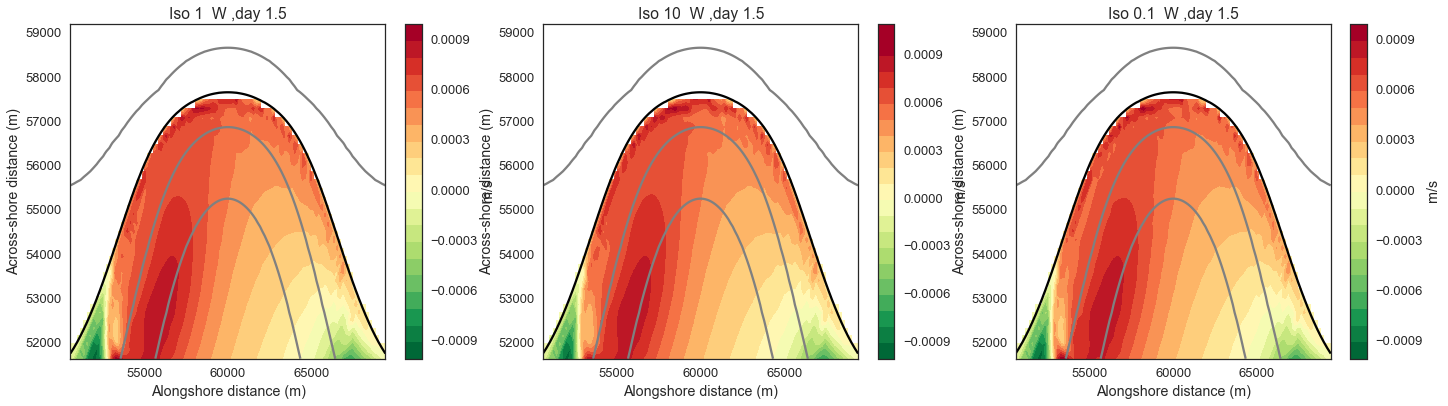

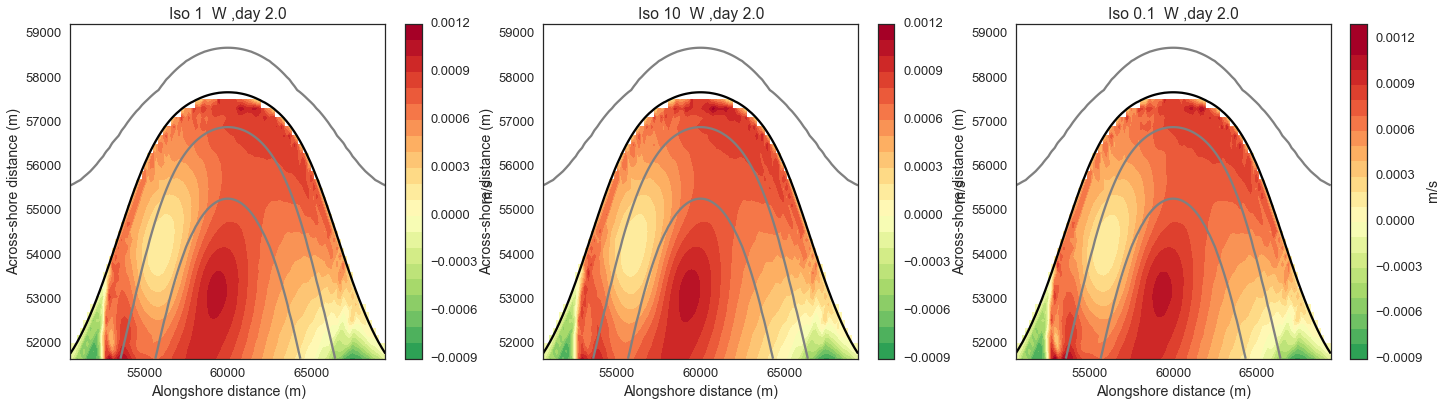

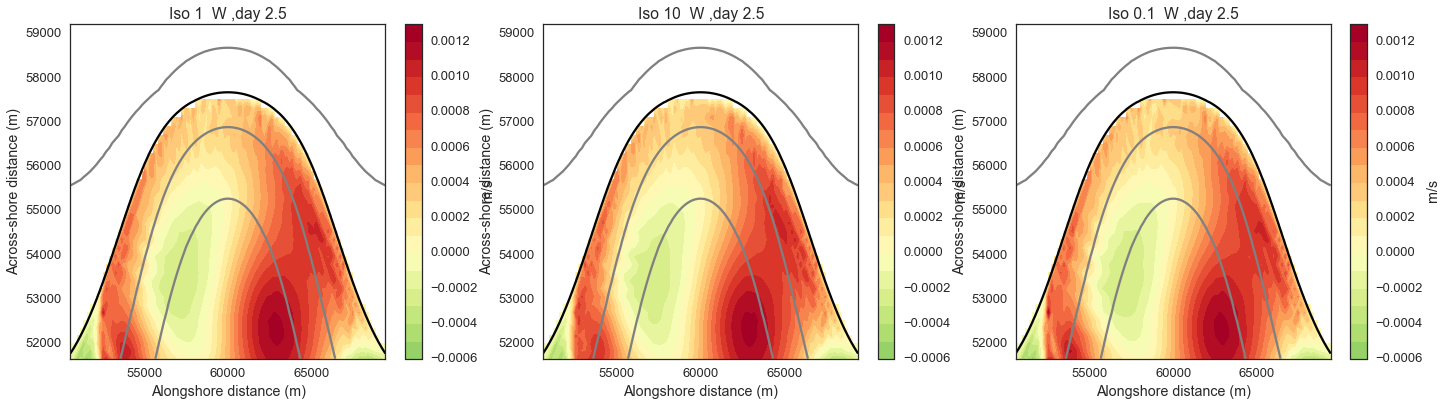

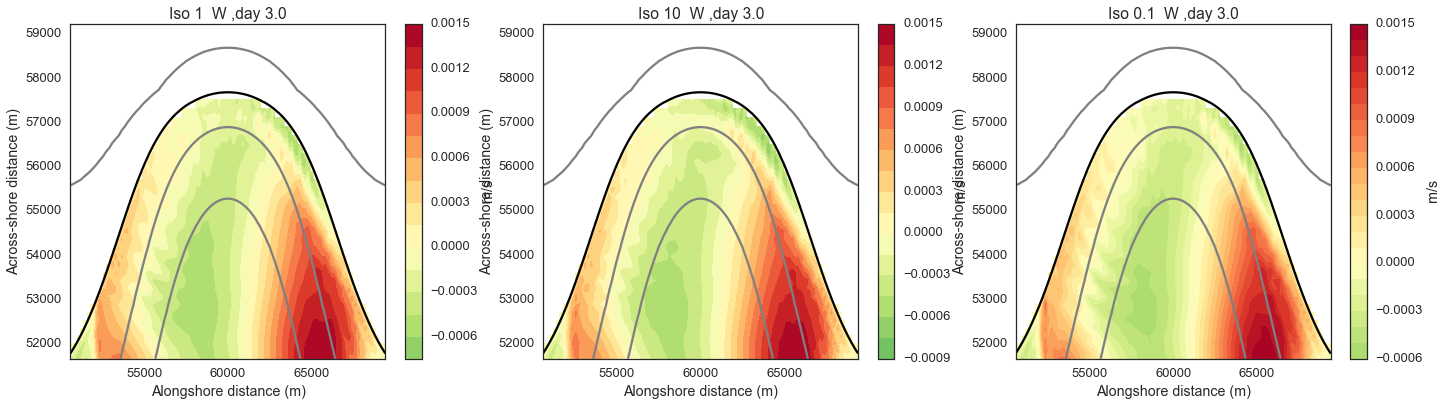

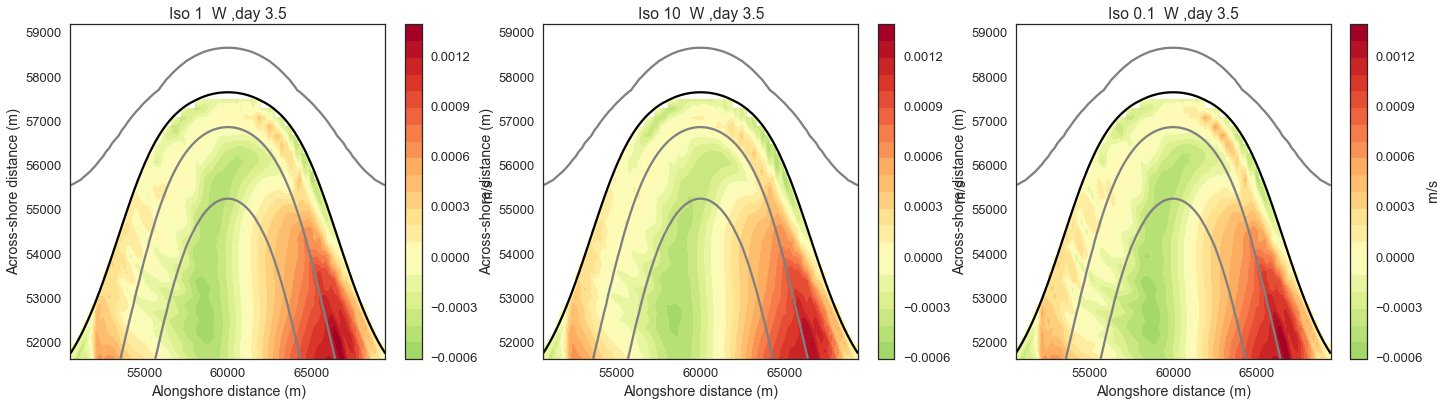

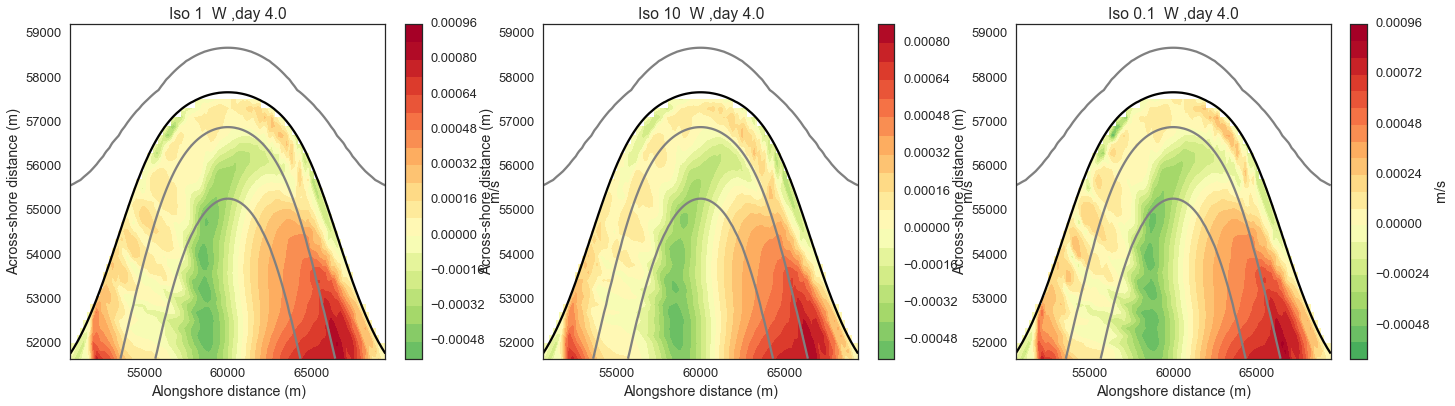

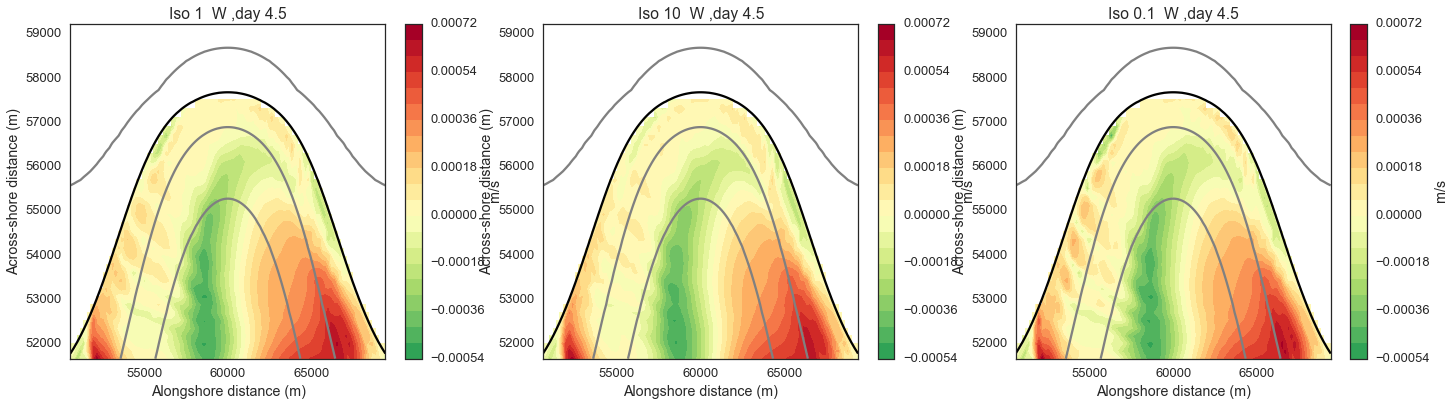

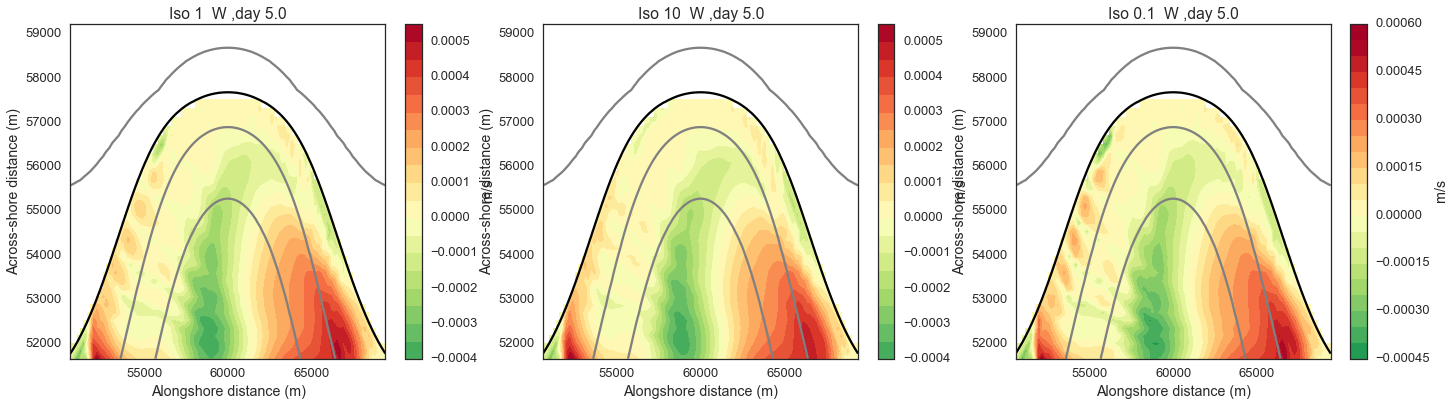

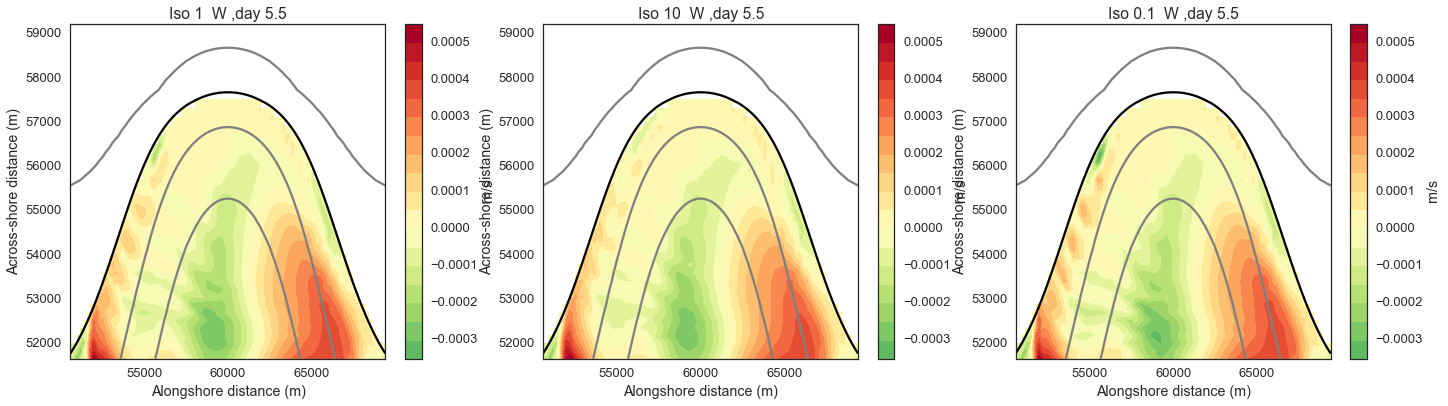

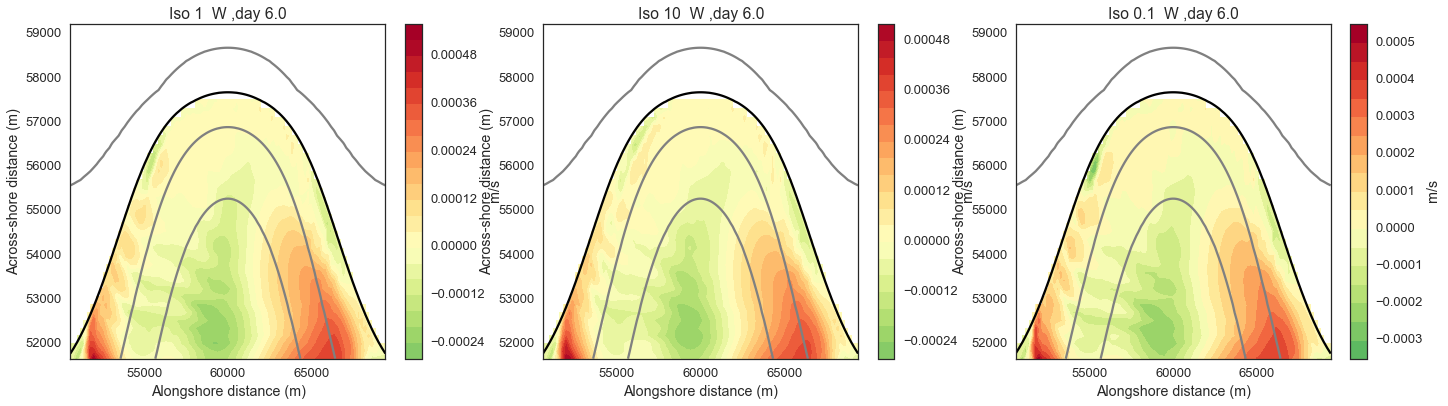

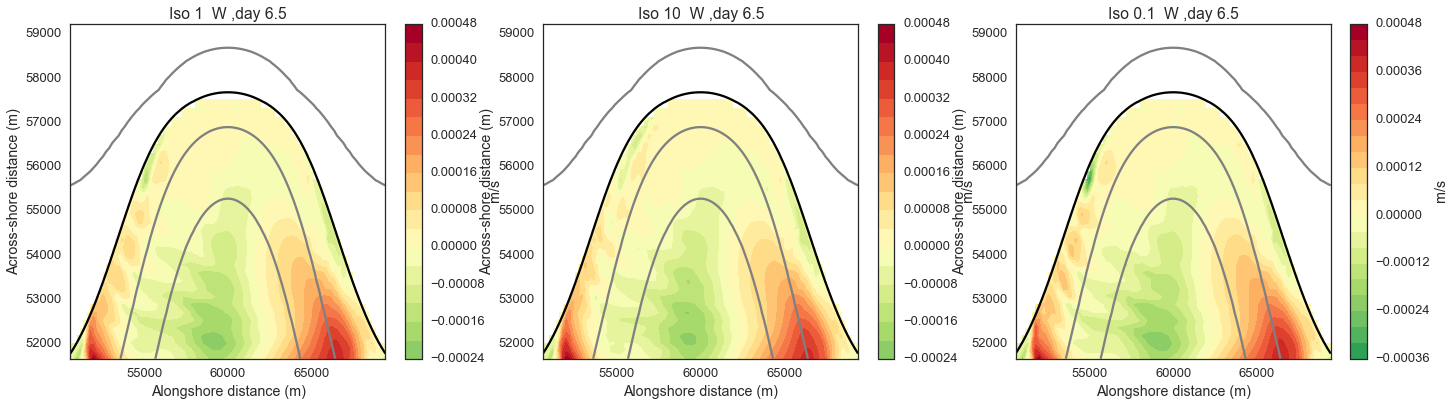

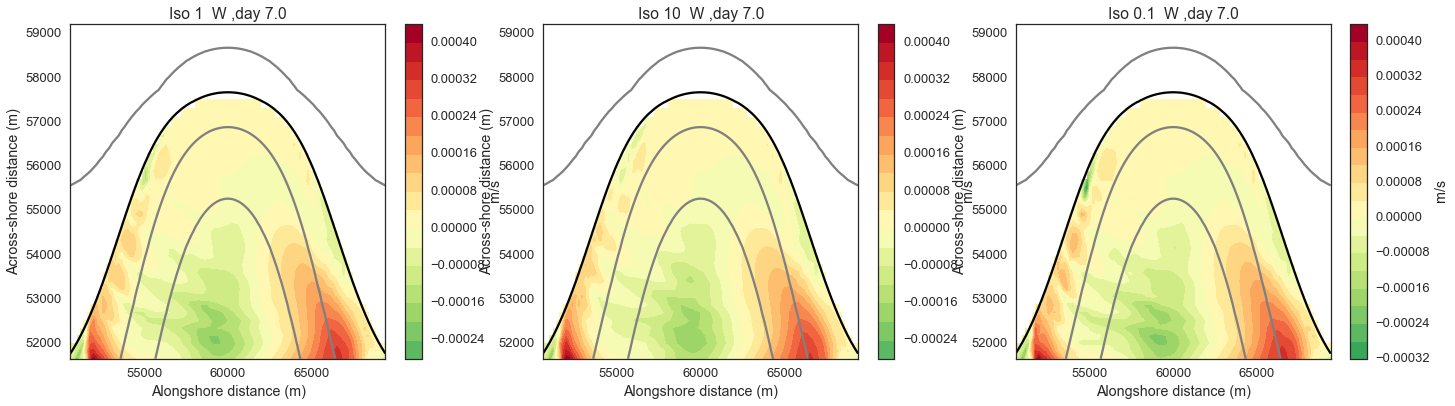

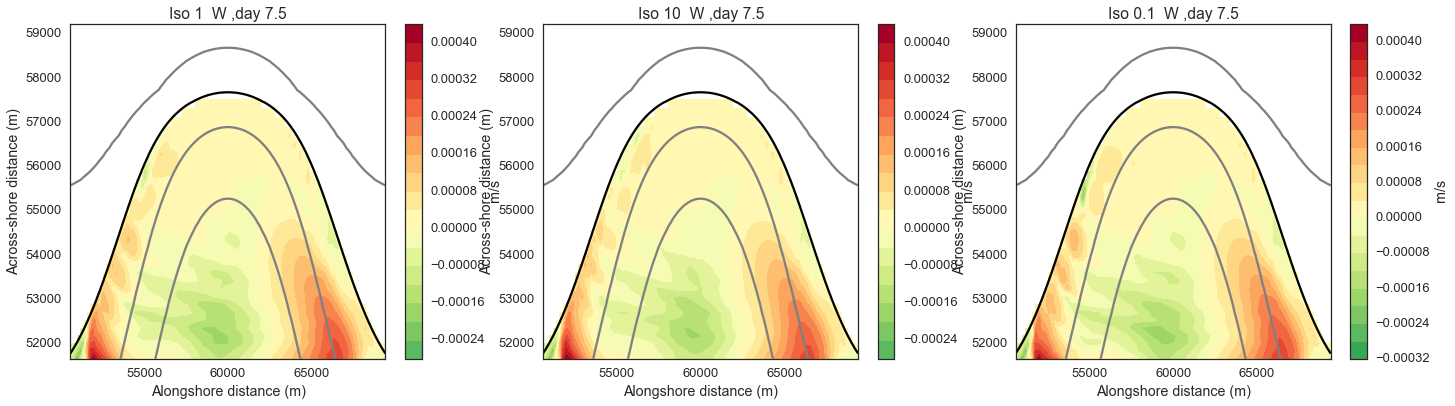

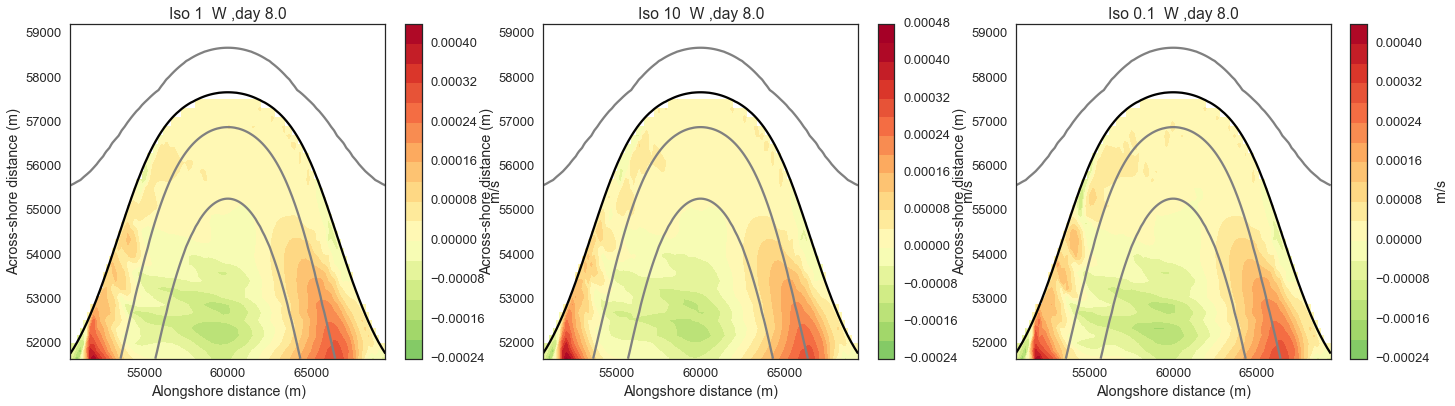

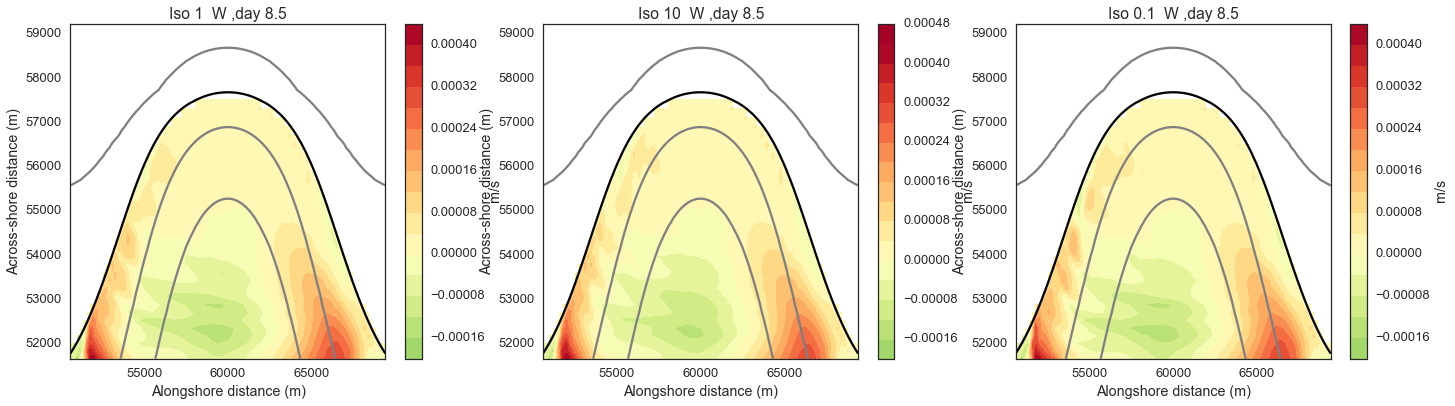

In [9]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

zlevel = 30

for tt in range(18):
    
    fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(24, 6))
    
    iso = ax1.contourf(xc[227:267,120:240],yc[227:267,120:240],WCNT3[tt,zlevel,227:267,120:240],20,cmap='RdYlGn_r',
                       vmin=-np.max(WCNT3[tt,zlevel,227:267,120:240]), vmax=np.max(WCNT3[tt,zlevel,227:267,120:240]))
    cb = plt.colorbar(iso, shrink=1,ax=ax1)
    cb.set_label('m/s')
    cset = ax1.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax1.set_aspect('auto')
    ax1.set_title('Iso 1  W ,day %0.1f ' %(tt/2.0))
    ax1.set_ylabel('Across-shore distance (m)')
    ax1.set_xlabel('Alongshore distance (m)')
    
    
    iso = ax2.contourf(xc[227:267,120:240],yc[227:267,120:240],WCNT2[tt,zlevel,227:267,120:240],20,cmap='RdYlGn_r',
                       vmin=-np.max(WCNT3[tt,zlevel,227:267,120:240]), vmax=np.max(WCNT3[tt,zlevel,227:267,120:240]))
    cb = plt.colorbar(iso, shrink=1,ax=ax2)
    cb.set_label('m/s')
    cset = ax2.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax2.set_aspect('auto')
    ax2.set_title('Iso 10  W ,day %0.1f ' %(tt/2.0))
    ax2.set_ylabel('Across-shore distance (m)')
    ax2.set_xlabel('Alongshore distance (m)')
    
    
    iso = ax3.contourf(xc[227:267,120:240],yc[227:267,120:240],WCNT4[tt,zlevel,227:267,120:240],20,cmap='RdYlGn_r',
                       vmin=-np.max(WCNT3[tt,zlevel,227:267,120:240]), vmax=np.max(WCNT3[tt,zlevel,227:267,120:240]))
    cb = plt.colorbar(iso, shrink=1,ax=ax3)
    cb.set_label('m/s')
    cset = ax3.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax3.set_aspect('auto')
    ax3.set_title('Iso 0.1  W ,day %0.1f ' %(tt/2.0))
    ax3.set_ylabel('Across-shore distance (m)')
    ax3.set_xlabel('Alongshore distance (m)')
    
    
    
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

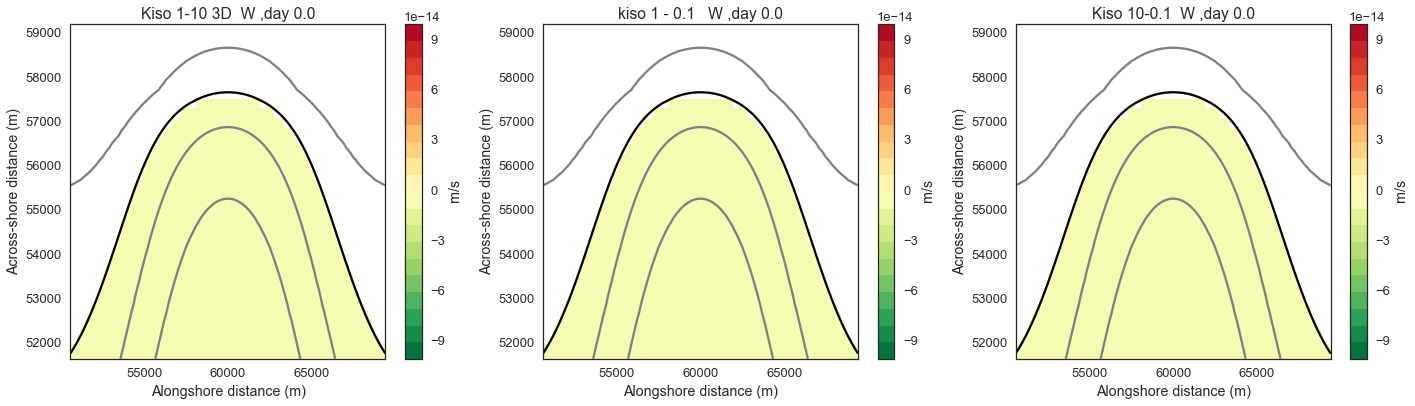

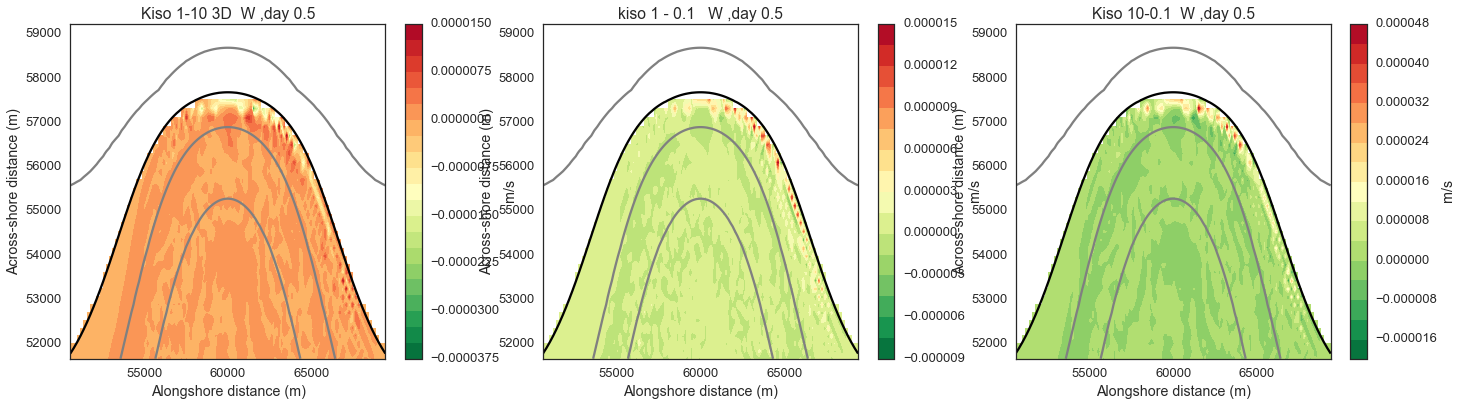

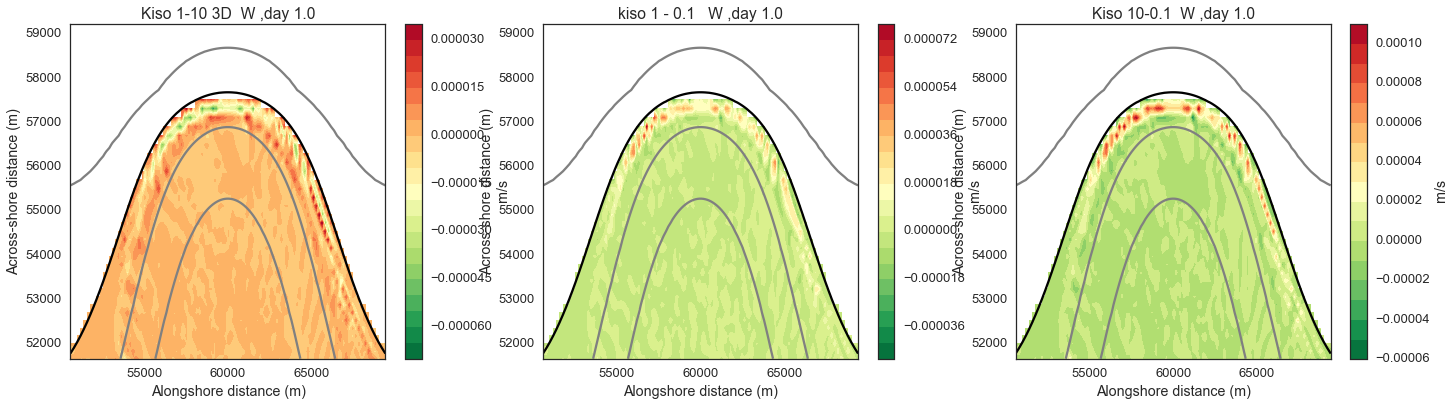

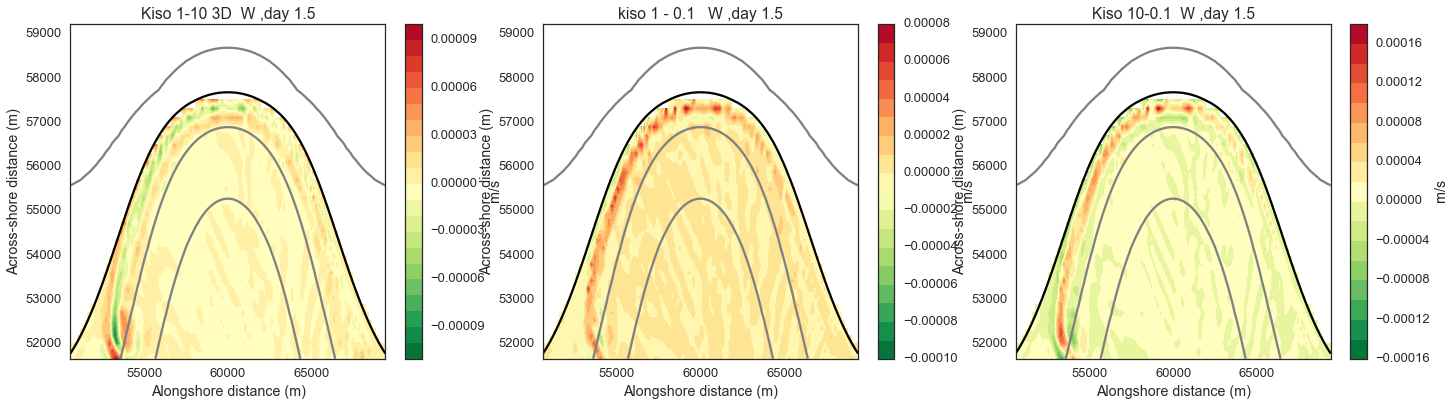

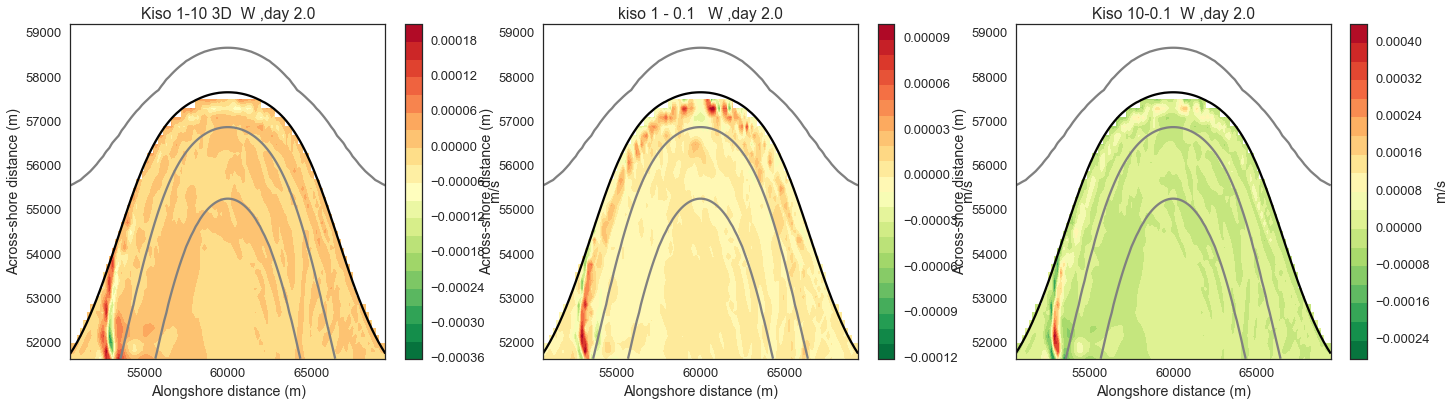

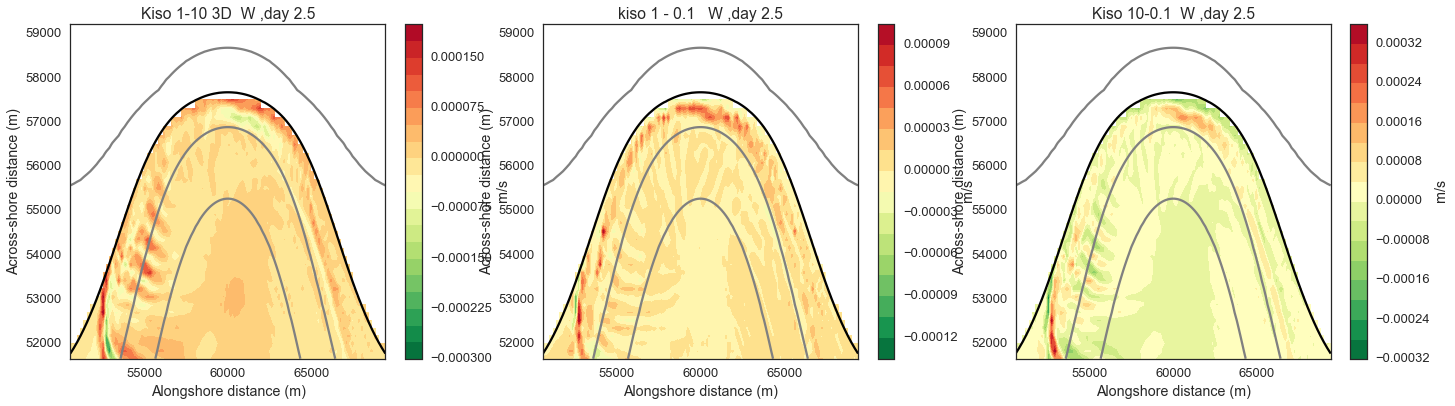

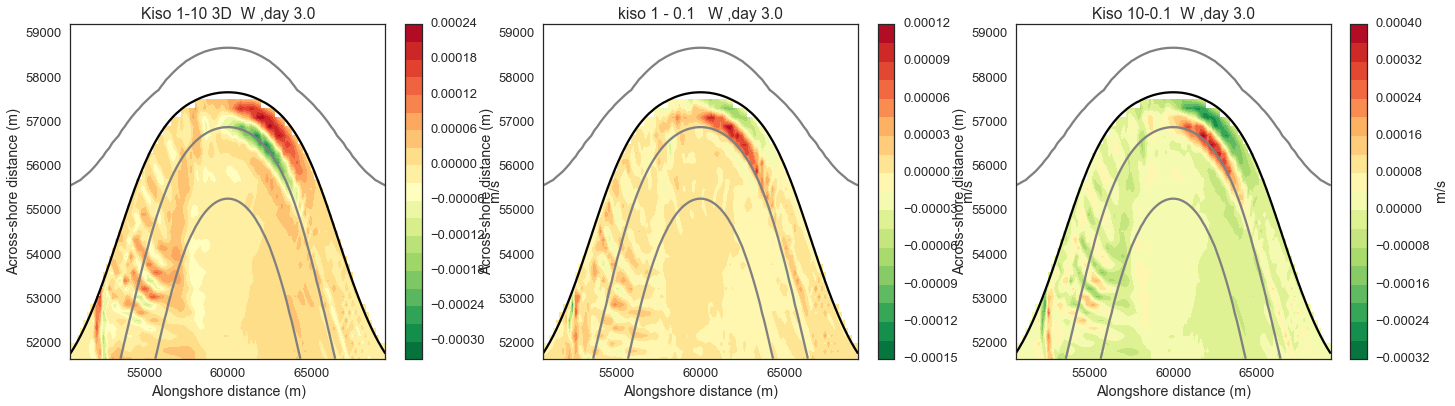

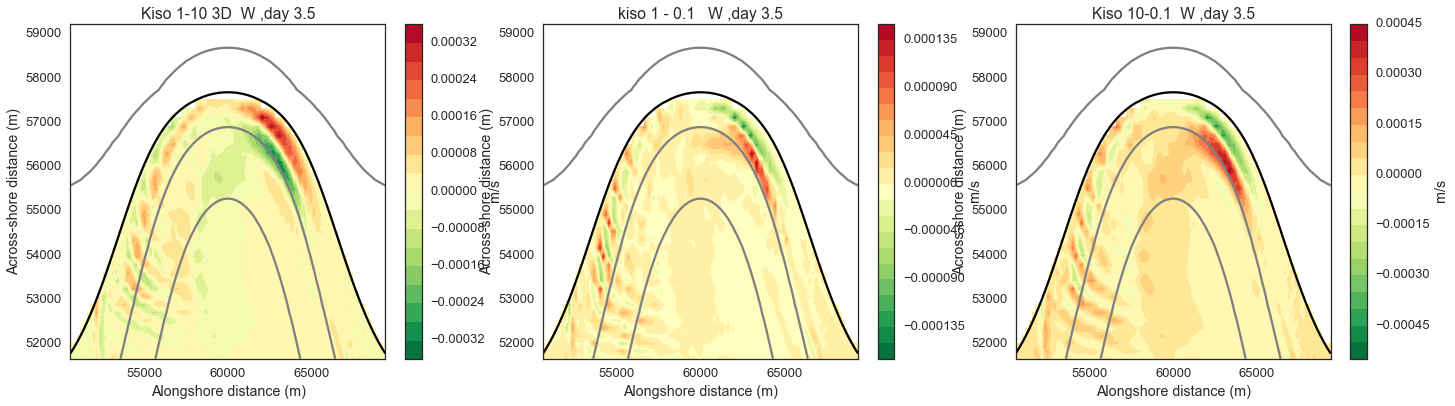

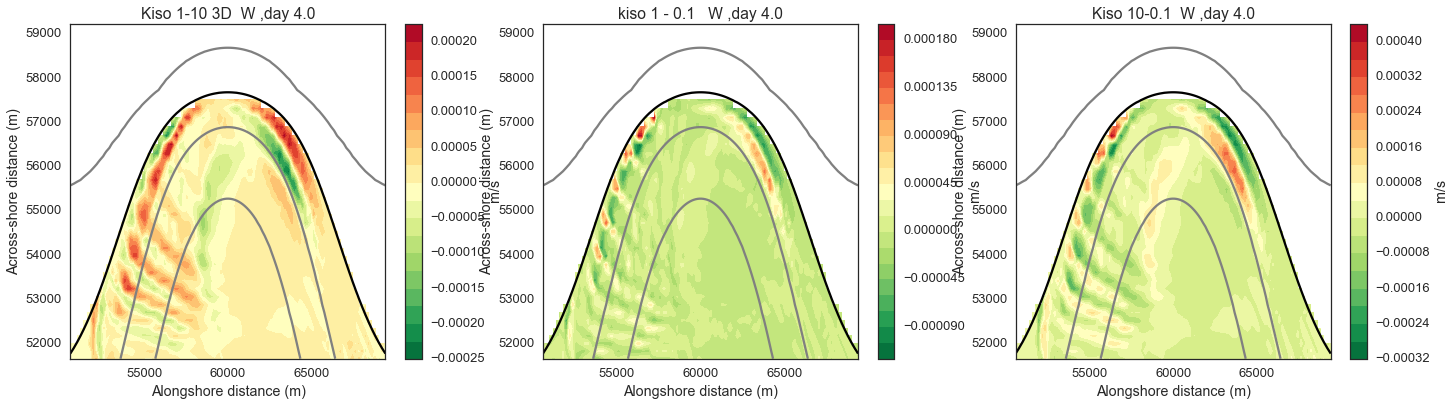

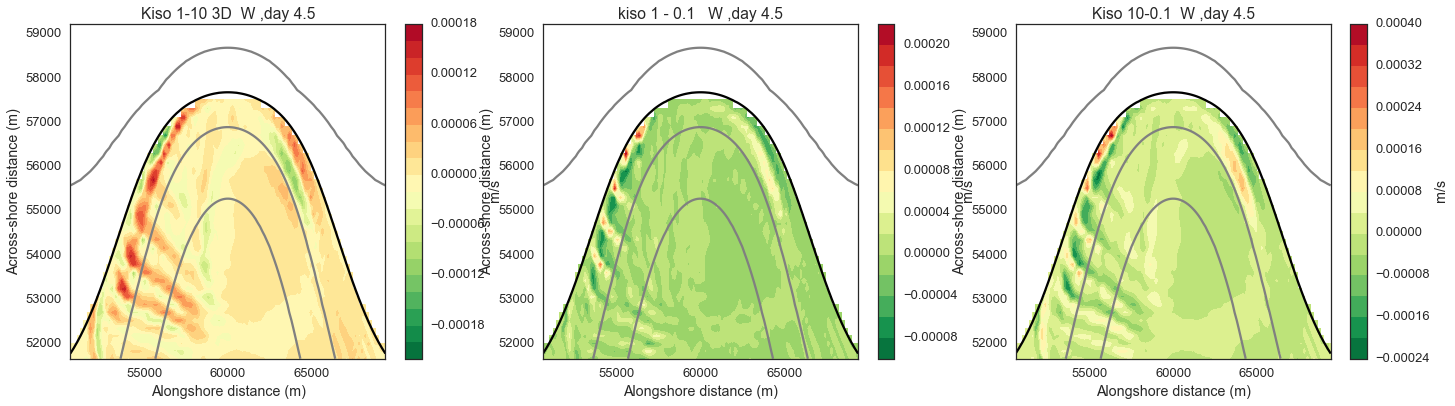

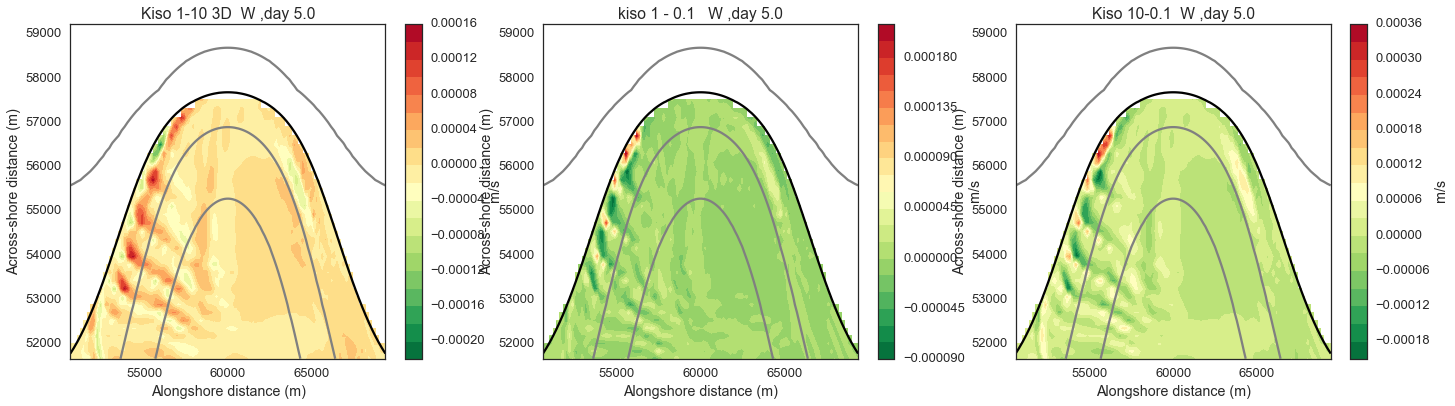

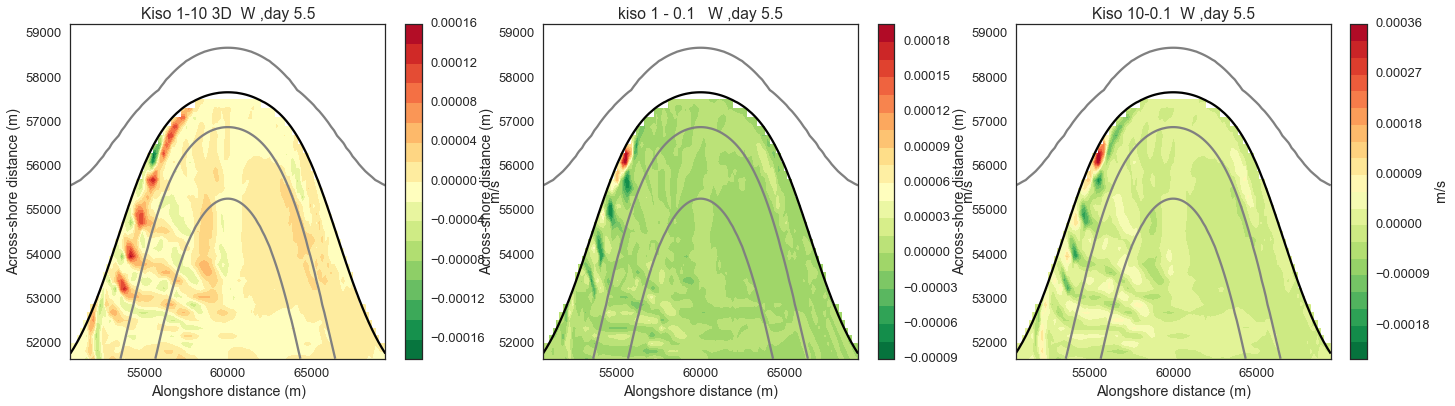

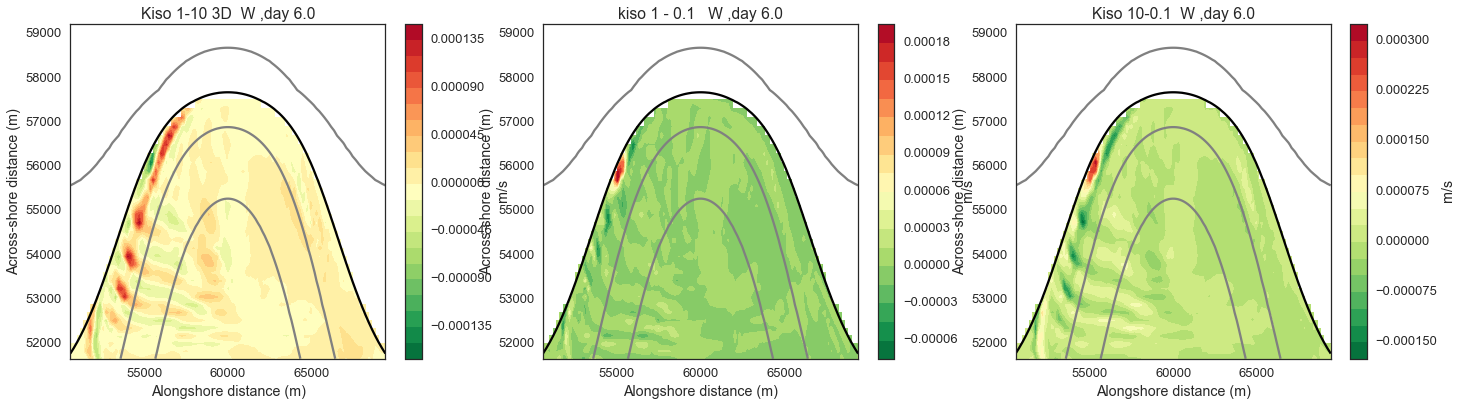

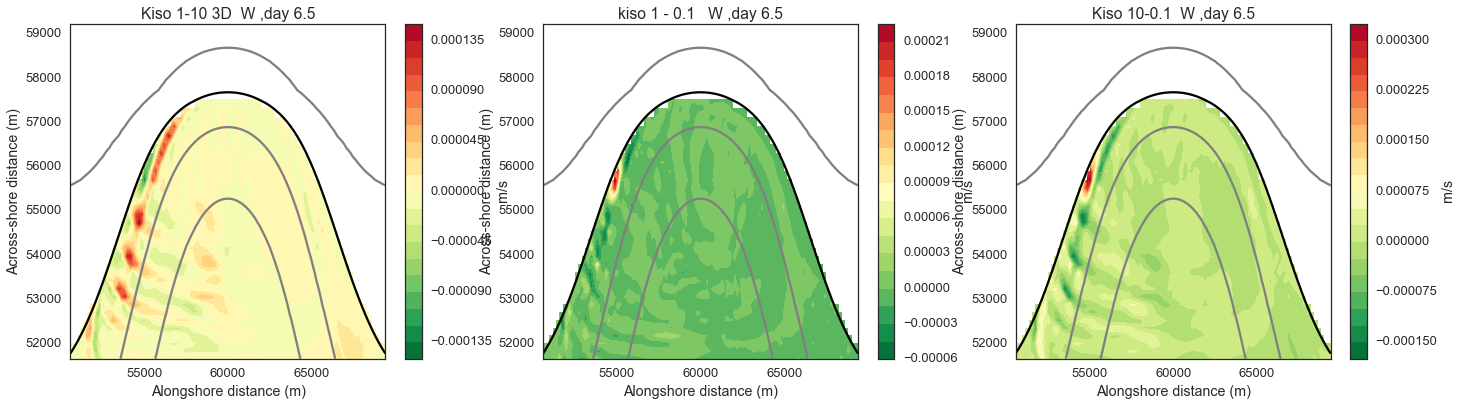

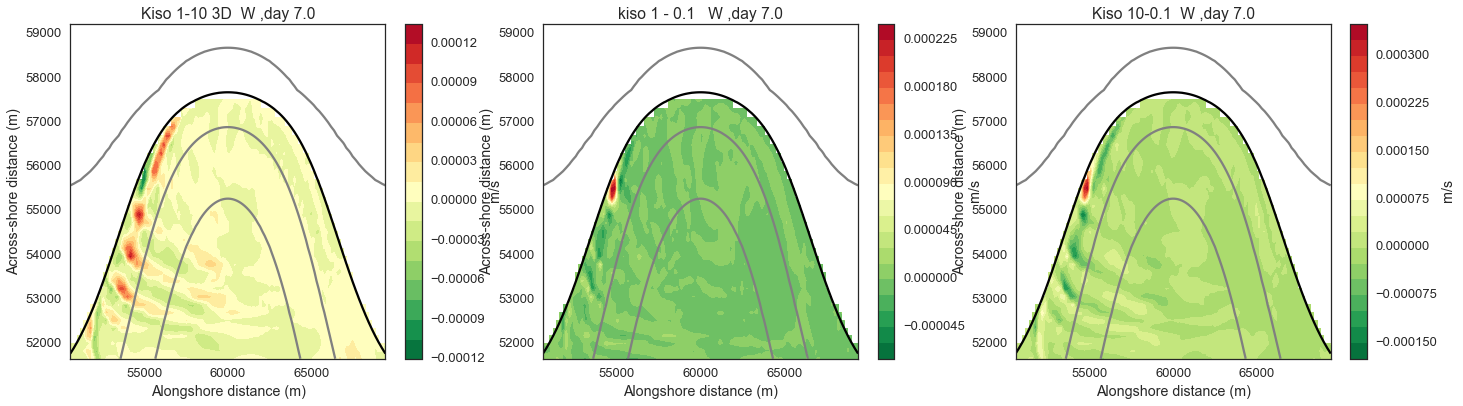

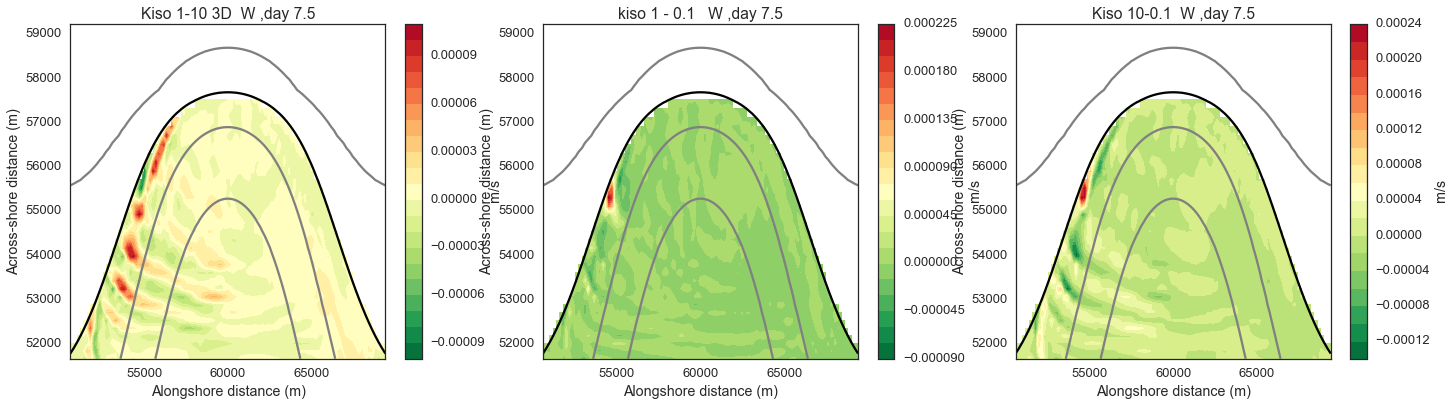

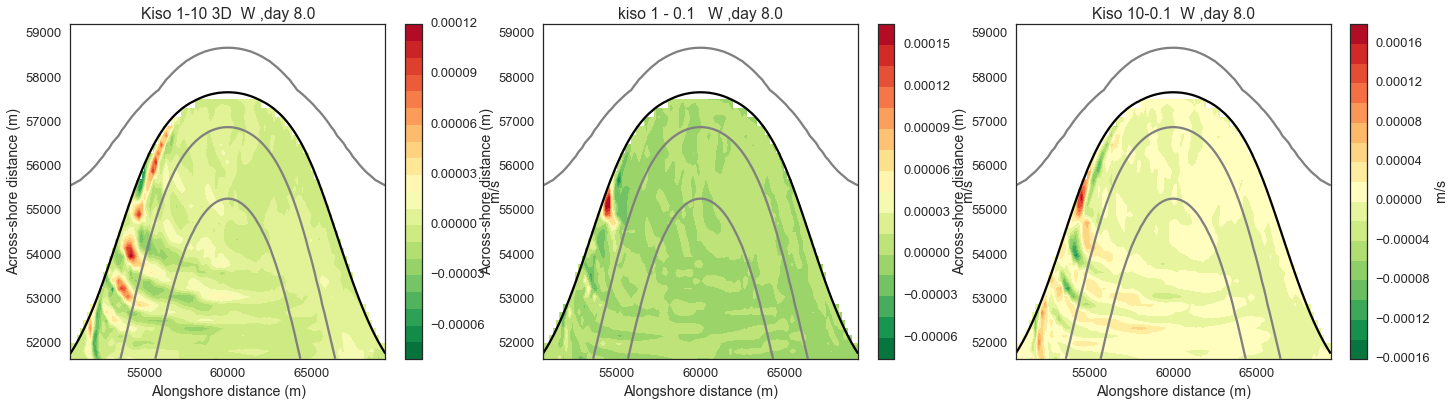

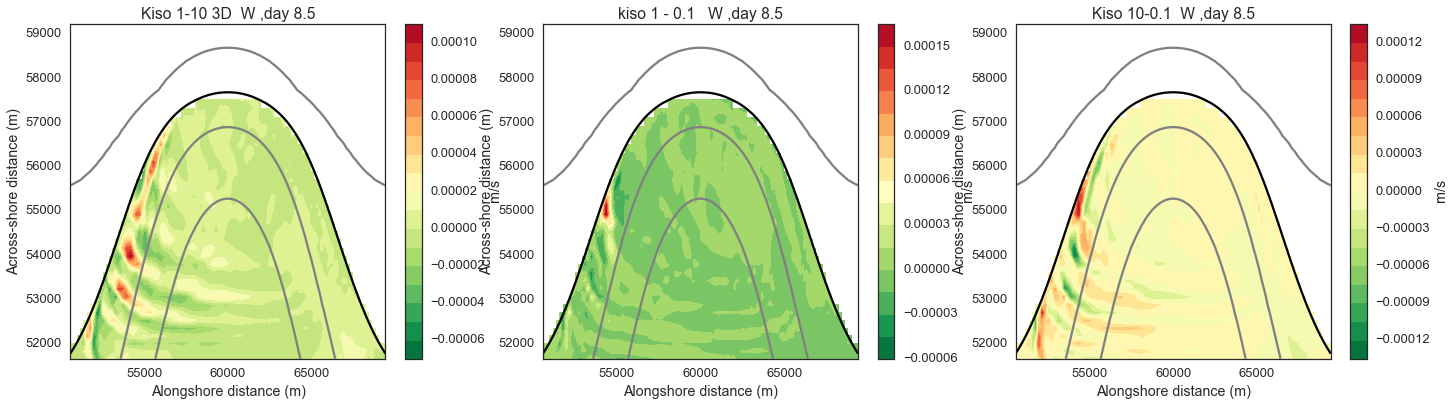

In [10]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})

zlevel = 30

for tt in range(18):
    
    fig,((ax1),(ax2),(ax3)) = plt.subplots(1, 3, figsize=(24,6 ))
    
    iso = ax1.contourf(xc[227:267,120:240],yc[227:267,120:240],WCNT3[tt,zlevel,227:267,120:240]-WCNT2[tt,zlevel,227:267,120:240],
                       20,cmap='RdYlGn_r')
    cb = plt.colorbar(iso, shrink=1,ax=ax1)
    cb.set_label('m/s')
    cset = ax1.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax1.set_aspect('auto')
    ax1.set_title('Kiso 1-10 3D  W ,day %0.1f ' %(tt/2.0))
    ax1.set_ylabel('Across-shore distance (m)')
    ax1.set_xlabel('Alongshore distance (m)')
    
    
    iso = ax2.contourf(xc[227:267,120:240],yc[227:267,120:240],WCNT3[tt,zlevel,227:267,120:240]-WCNT4[tt,zlevel,227:267,120:240],
                       20,cmap='RdYlGn_r')
    cb = plt.colorbar(iso, shrink=1,ax=ax2)
    cb.set_label('m/s')
    cset = ax2.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax2.set_aspect('auto')
    ax2.set_title('kiso 1 - 0.1   W ,day %0.1f ' %(tt/2.0))
    ax2.set_ylabel('Across-shore distance (m)')
    ax2.set_xlabel('Alongshore distance (m)')
    
    
    iso = ax3.contourf(xc[227:267,120:240],yc[227:267,120:240],WCNT2[tt,zlevel,227:267,120:240]-WCNT4[tt,zlevel,227:267,120:240],
                       20,cmap='RdYlGn_r')
    cb = plt.colorbar(iso, shrink=1,ax=ax3)
    cb.set_label('m/s')
    cset = ax3.contour(xc[227:267,120:240],yc[227:267,120:240],-bathy[227:267,120:240],[-300,-200, rc[30],-125,-100,-75,-50],colors=['0.50','0.50','k','0.50','0.50','0.50','0.50'],linewidth=1, rstride=2, cstride=2,zdir='z')

    ax3.set_aspect('auto')
    ax3.set_title('Kiso 10-0.1  W ,day %0.1f ' %(tt/2.0))
    ax3.set_ylabel('Across-shore distance (m)')
    ax3.set_xlabel('Alongshore distance (m)')
    
    
    
    plt.show

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

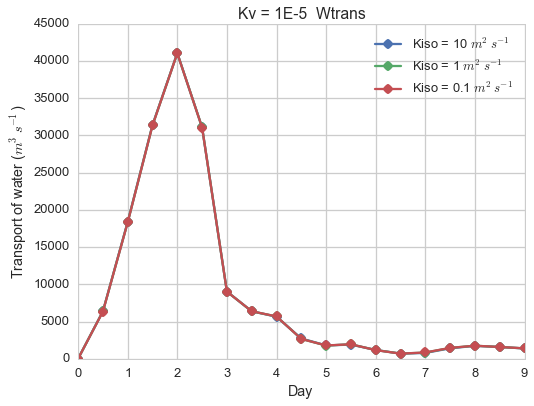

In [11]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})
sns.set_style('whitegrid')

zlevel = 30

W3trans = np.sum(np.sum(WCNT3[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W2trans = np.sum(np.sum(WCNT2[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W4trans = np.sum(np.sum(WCNT4[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)

fig,(ax1) = plt.subplots(1, 1, figsize=(8,6 ))

plt.plot(np.arange(19)/2.0,W2trans,'o-',label ='Kiso = 10 $m^2s^{-1}$')
plt.plot(np.arange(19)/2.0,W3trans,'o-', label = 'Kiso = 1 $m^2s^{-1}$')
plt.plot(np.arange(19)/2.0,W4trans,'o-',label='Kiso = 0.1 $m^2s^{-1}$')

ax1.set_aspect('auto')
ax1.set_title('Kv = 1E-5  Wtrans')
ax1.set_ylabel('Transport of water ($m^3s^{-1}$)')
ax1.set_xlabel('Day')
plt.legend( loc=0)    
    
plt.show()

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')

In [12]:
FluxTr01CNT3 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/FluxTR01Glob.nc' 
FluxTr01CNT2 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run02/FluxTR01Glob.nc' 
FluxTr01CNT4 = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run04/FluxTR01Glob.nc' 


WTRAC01CNT3 = rout.getField(FluxTr01CNT3,'WTRAC01') #
WTRAC01CNT2 = rout.getField(FluxTr01CNT2,'WTRAC01') #
WTRAC01CNT4 = rout.getField(FluxTr01CNT4,'WTRAC01') #


In [13]:
WDIFF01CNT3 = rout.getField(FluxTr01CNT3,'DFrETr01') #
WDIFF01CNT2 = rout.getField(FluxTr01CNT2,'DFrETr01') #
WDIFF01CNT4 = rout.getField(FluxTr01CNT4,'DFrETr01') #

WADV01CNT3 = rout.getField(FluxTr01CNT3,'ADVrTr01') #
WADV01CNT2 = rout.getField(FluxTr01CNT2,'ADVrTr01') #
WADV01CNT4 = rout.getField(FluxTr01CNT4,'ADVrTr01') #

In [14]:
mask_expand = np.expand_dims(MaskC,0)
mask_expand = mask_expand + np.zeros(WTRAC01CNT3.shape)


WTRAC01CNT3= np.ma.masked_array(WTRAC01CNT3,mask = mask_expand)
WTRAC01CNT2= np.ma.masked_array(WTRAC01CNT2,mask = mask_expand)
WTRAC01CNT4= np.ma.masked_array(WTRAC01CNT4,mask = mask_expand)
 

In [15]:
WDIFF01CNT3= np.ma.masked_array(WDIFF01CNT3,mask = mask_expand)
WDIFF01CNT2= np.ma.masked_array(WDIFF01CNT2,mask = mask_expand)
WDIFF01CNT4= np.ma.masked_array(WDIFF01CNT4,mask = mask_expand)

WADV01CNT3= np.ma.masked_array(WADV01CNT3,mask = mask_expand)
WADV01CNT2= np.ma.masked_array(WADV01CNT2,mask = mask_expand)
WADV01CNT4= np.ma.masked_array(WADV01CNT4,mask = mask_expand)


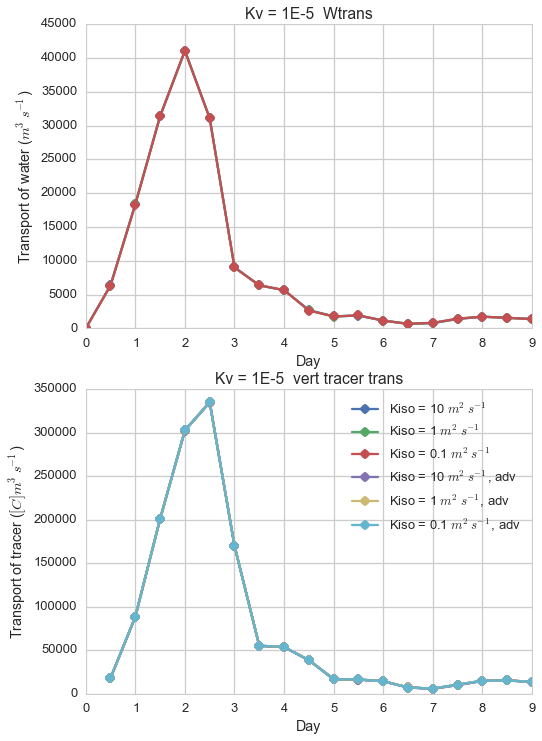

In [18]:
plt.rcParams['contour.negative_linestyle'] = 'solid' # default is to have negative contours with dashed lines
plt.rcParams.update({'font.size':20})
sns.set_style('whitegrid')

zlevel = 30

W3trans = np.sum(np.sum(WCNT3[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W2trans = np.sum(np.sum(WCNT2[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W4trans = np.sum(np.sum(WCNT4[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)

W3trac = np.sum(np.sum(WTRAC01CNT3[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W2trac = np.sum(np.sum(WTRAC01CNT2[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)
W4trac = np.sum(np.sum(WTRAC01CNT4[:,zlevel,227:267,120:240]*rA[227:267,120:240],axis=2),axis=1)

W3diff = np.sum(np.sum(WDIFF01CNT3[:,zlevel,227:267,120:240],axis=2),axis=1)
W2diff = np.sum(np.sum(WDIFF01CNT2[:,zlevel,227:267,120:240],axis=2),axis=1)
W4diff = np.sum(np.sum(WDIFF01CNT4[:,zlevel,227:267,120:240],axis=2),axis=1)

W3adv = np.sum(np.sum(WADV01CNT3[:,zlevel,227:267,120:240],axis=2),axis=1)
W2adv = np.sum(np.sum(WADV01CNT2[:,zlevel,227:267,120:240],axis=2),axis=1)
W4adv = np.sum(np.sum(WADV01CNT4[:,zlevel,227:267,120:240],axis=2),axis=1)

fig,(ax1,ax2) = plt.subplots(2, 1, figsize=(8,12 ))

ax1.plot(np.arange(19)/2.0,W2trans,'o-',label ='Kiso = 10 $m^2s^{-1}$')
ax1.plot(np.arange(19)/2.0,W3trans,'o-', label = 'Kiso = 1 $m^2s^{-1}$')
ax1.plot(np.arange(19)/2.0,W4trans,'o-',label='Kiso = 0.1 $m^2s^{-1}$')

ax1.set_aspect('auto')
ax1.set_title('Kv = 1E-5  Wtrans')
ax1.set_ylabel('Transport of water ($m^3s^{-1}$)')
ax1.set_xlabel('Day')

ax2.plot(np.arange(1,19,1)/2.0,W2trac,'o-',label ='Kiso = 10 $m^2s^{-1}$')
ax2.plot(np.arange(1,19,1)/2.0,W3trac,'o-', label = 'Kiso = 1 $m^2s^{-1}$')
ax2.plot(np.arange(1,19,1)/2.0,W4trac,'o-',label='Kiso = 0.1 $m^2s^{-1}$')

#ax2.plot(np.arange(1,19,1)/2.0,W2diff,'o-',label ='Kiso = 10 $m^2s^{-1}, diff$')
#ax2.plot(np.arange(1,19,1)/2.0,W3diff,'o-', label = 'Kiso = 1 $m^2s^{-1}$, diff')
#ax2.plot(np.arange(1,19,1)/2.0,W4diff,'o-',label='Kiso = 0.1 $m^2s^{-1}$, diff')

ax2.plot(np.arange(1,19,1)/2.0,W2adv,'o-',label ='Kiso = 10 $m^2s^{-1}$, adv')
ax2.plot(np.arange(1,19,1)/2.0,W3adv,'o-', label = 'Kiso = 1 $m^2s^{-1}$, adv')
ax2.plot(np.arange(1,19,1)/2.0,W4adv,'o-',label='Kiso = 0.1 $m^2s^{-1}$, adv')

ax2.set_aspect('auto')
ax2.set_title('Kv = 1E-5  vert tracer trans')
ax2.set_ylabel('Transport of tracer ($[C]m^3s^{-1}$)')
ax2.set_xlabel('Day')
plt.legend( loc=0)    
    
plt.show()

#fig.savefig('/ocean/kramosmu/Figures/BathyShelfBoxComplete.eps', format='eps', dpi=1000, bbox_inches='tight')